## CS5102 - DIP Project | Quality Inspection of the Workpiece

Group: 29 <br>
Authors: <br>
 Deep Patel, ME21D0004 <br>
 Radhika Mittal, CED19I050 <br>
 Yash Kumar Sahu, CED19I039 

In [183]:
import os
import cv2
from matplotlib import pyplot as plt   

# Problem Domain

<img src=".\problem.png" >



# What is Existing?

[//]: # (Add some pictures from relevant literature) 

# What is Done?

## Image acquisition

<img src=".\workspace.png" >

**Workspace setup**

Camera Model: IS7802

40 sample images (Varied illumination, Posistion and orientation)

Workpiece size: ~25mm DIA and 30mm DIA (approx) 
Workpiece type: Aluminum 7075 and 6061

**Assumptions**

Similar
-  Reflective Property
-  Illumination
-  Height







## Colour image processing | Reading Input Color Image as Grayscale

No. of Images =  40


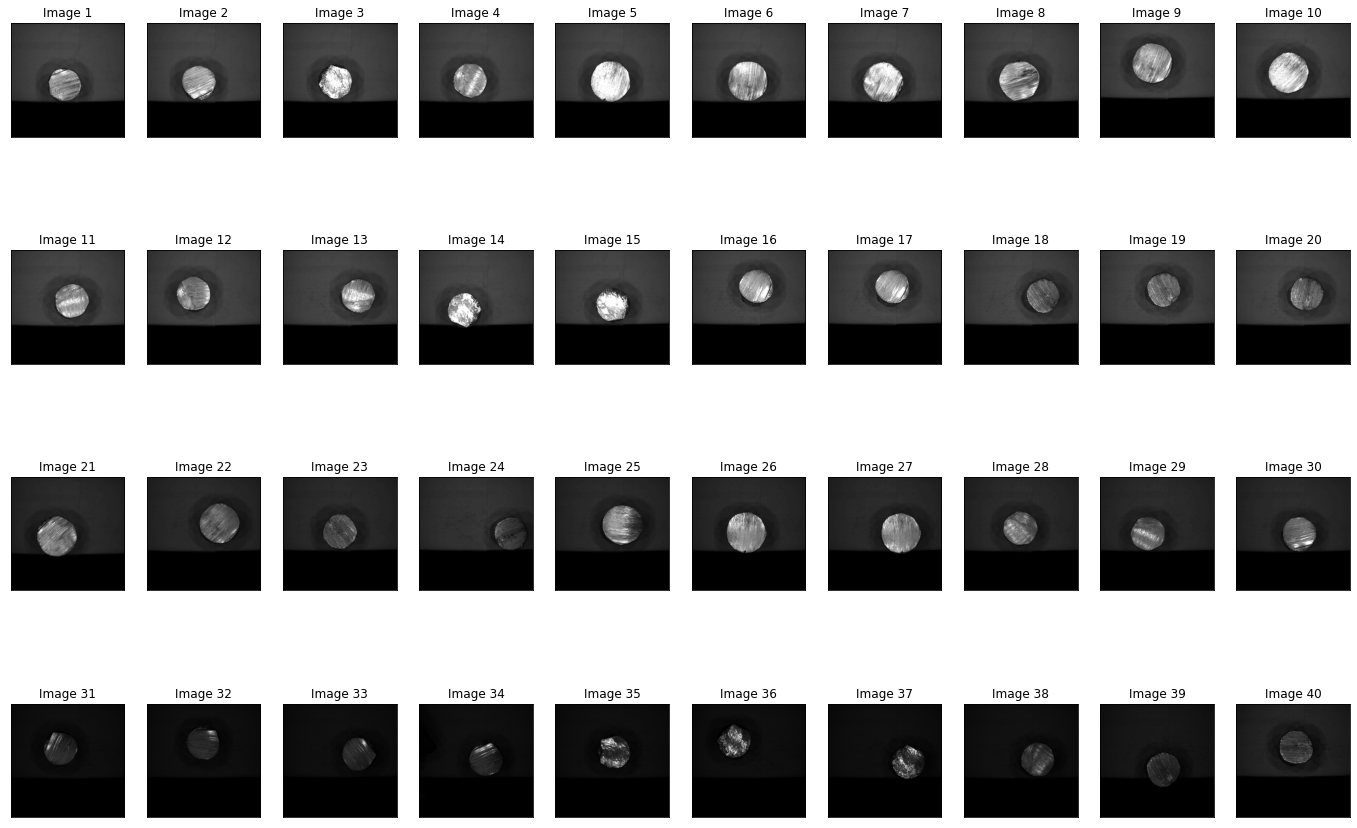

In [184]:
from matplotlib import pyplot as plt  
import cv2
import glob
import os
from PIL import Image, ImageOps 
import numpy as np

images = [Image.open(file) for file in glob.glob(os.getcwd()+"/dataset/*.BMP")]
print("No. of Images = ", len(images))
meta_data=[0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0]
gray_images=[]
rgb_images=[]
new_width=900
new_height=900

plt.rcParams["figure.figsize"]=24,16
for i in range(len(images)):
    im=images[i]
    width, height = im.size  # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    im2=np.array(im)
    rgb_images.append(im2)
    im=ImageOps.grayscale(im)
    im=np.array(im)
    gray_images.append(im)
    
    
for i in range(len(gray_images)):    
    plt.subplot(4,10,i+1),plt.imshow(gray_images[i],'gray')
    plt.title("Image "+str(i+1))
    plt.xticks([]),plt.yticks([])
plt.show()



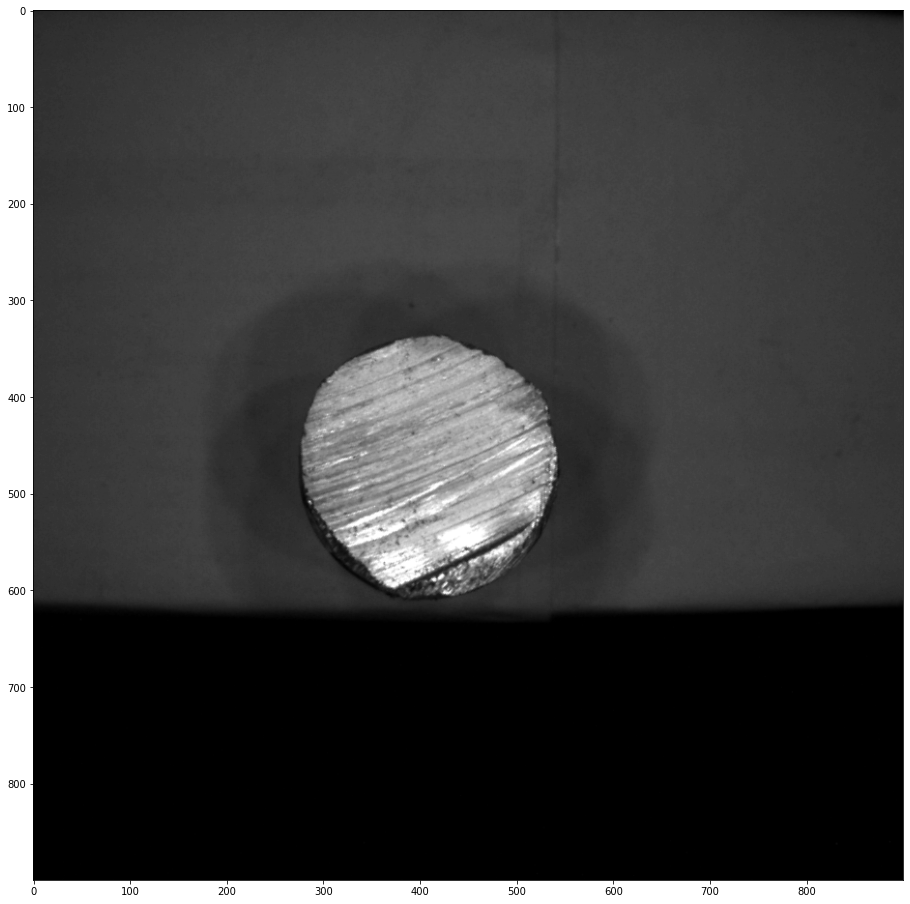

In [185]:
plt.imshow(gray_images[1], cmap='gray', vmin = 0, vmax = 255)

## Image filtering and enhancement

### Gaussian Filter

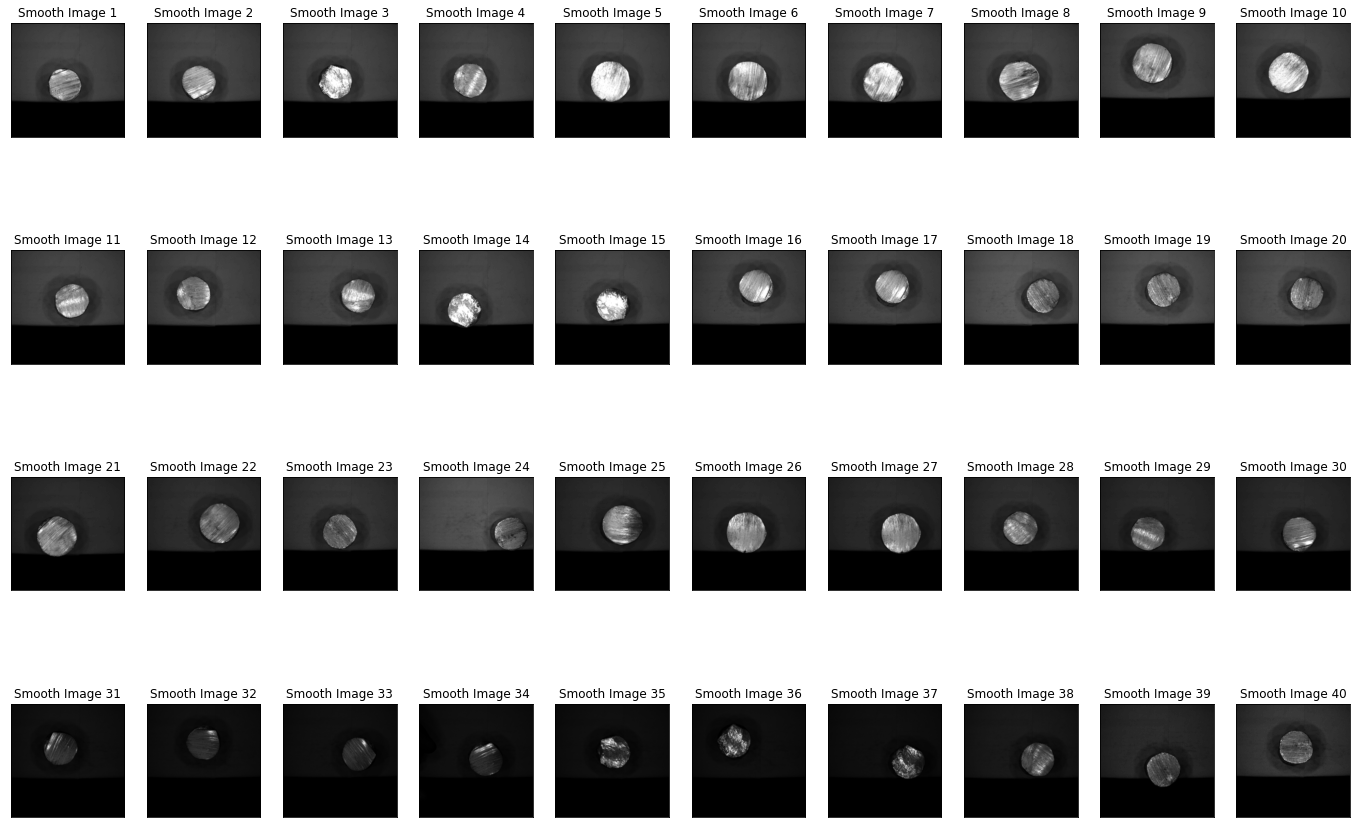

In [186]:
kernel = np.ones((5,5),np.float32)/25
smooth_images=[]
for i in range(len(gray_images)):
    smooth_images.append(cv2.filter2D(gray_images[i],-1,kernel))
    
    plt.subplot(4,10,i+1),plt.imshow(smooth_images[i],'gray')
    plt.title("Smooth Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

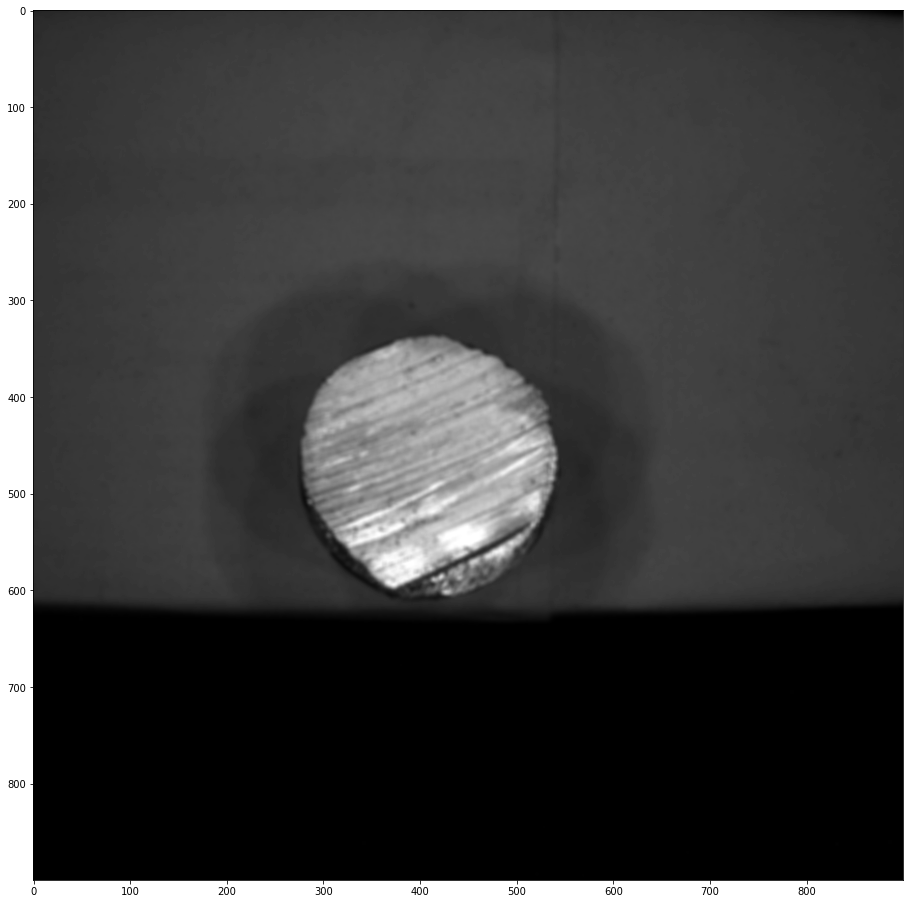

In [187]:
plt.imshow(smooth_images[1], cmap='gray', vmin = 0, vmax = 255)

### Median Filter


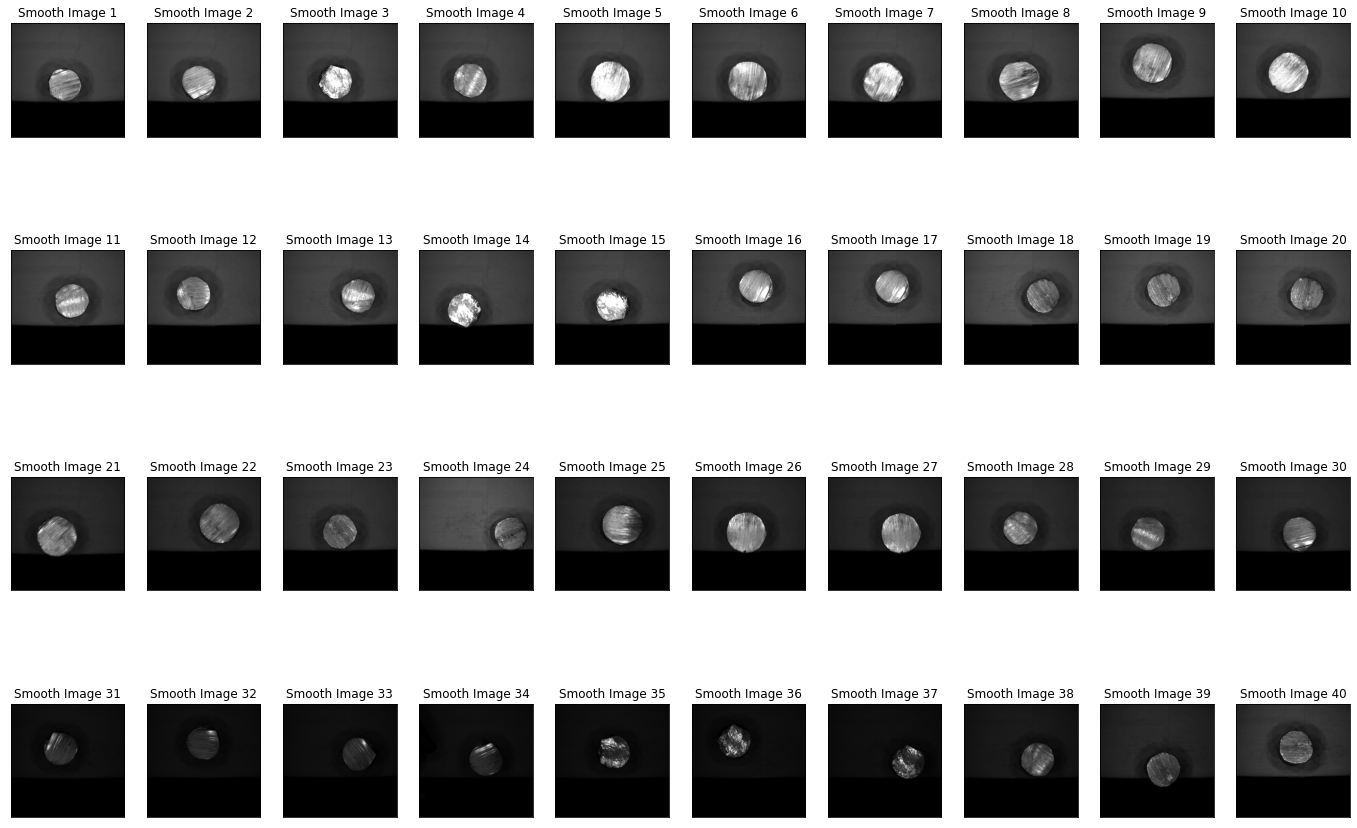

In [188]:
smooth_images=[]
for i in range(len(gray_images)):
    smooth_images.append(cv2.medianBlur(gray_images[i], 5))
    plt.subplot(4,10,i+1),plt.imshow(smooth_images[i],'gray')
    plt.title("Smooth Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

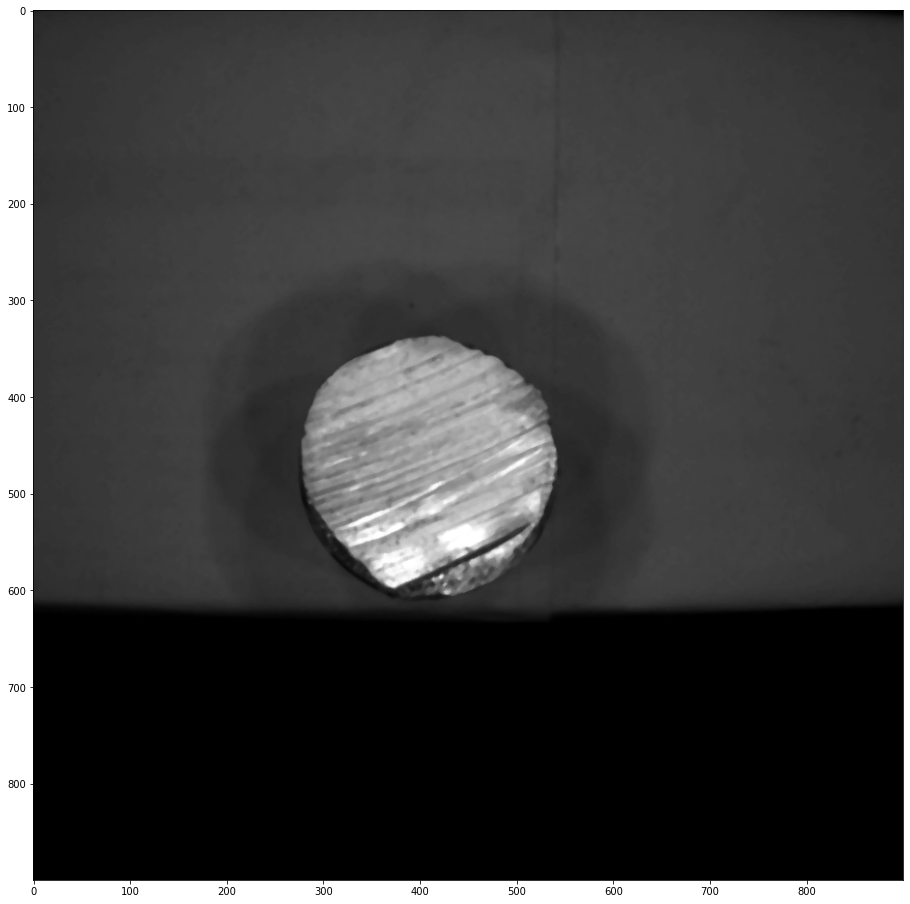

In [189]:
plt.imshow(smooth_images[1], cmap='gray', vmin = 0, vmax = 255)

### Histogram Equalisation


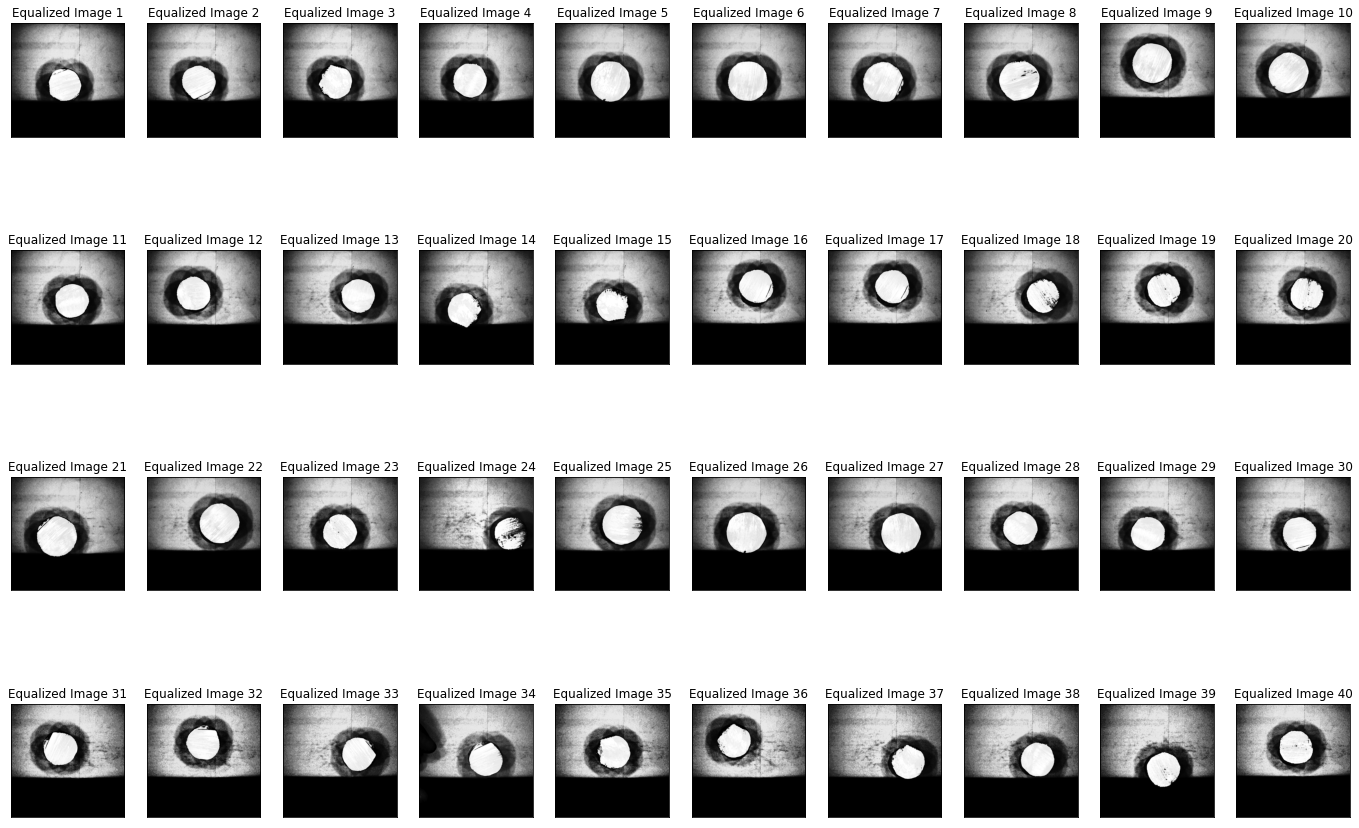

In [190]:
equal_images=[]
for i in range(len(smooth_images)):
    equal_images.append(cv2.equalizeHist(smooth_images[i]))
    plt.subplot(4,10,i+1),plt.imshow(equal_images[i],'gray')
    plt.title("Equalized Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

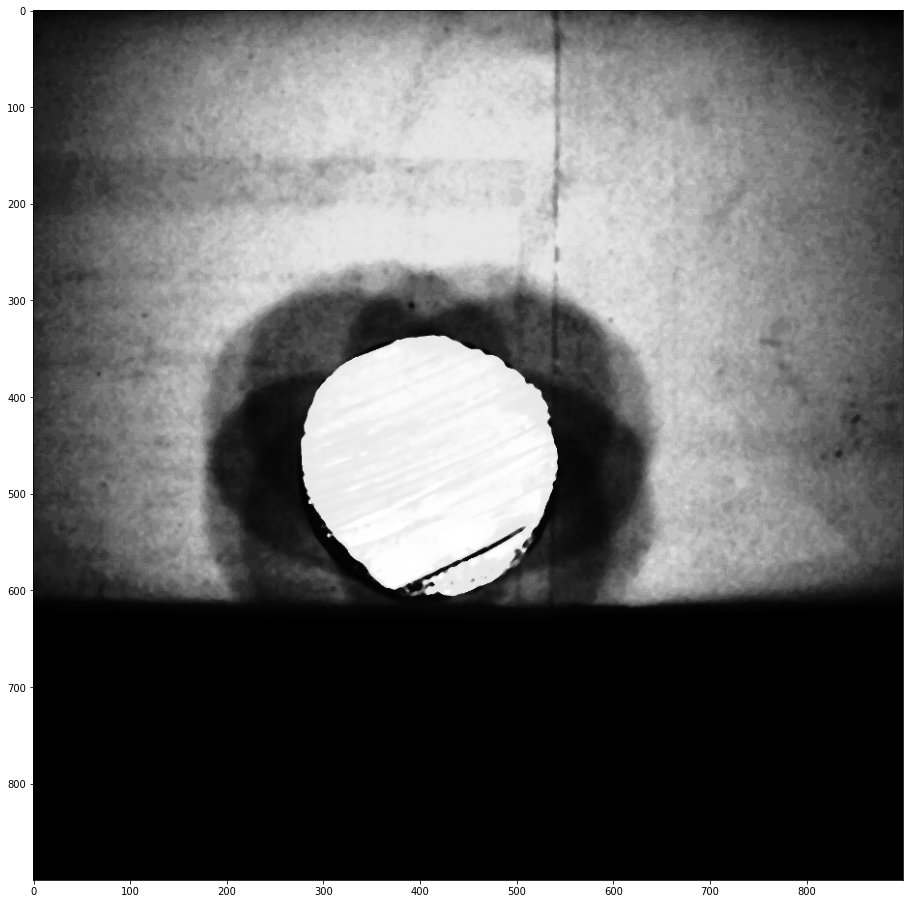

In [191]:
plt.imshow(equal_images[1], cmap='gray', vmin = 0, vmax = 255)

## Morphological processing

### Opening

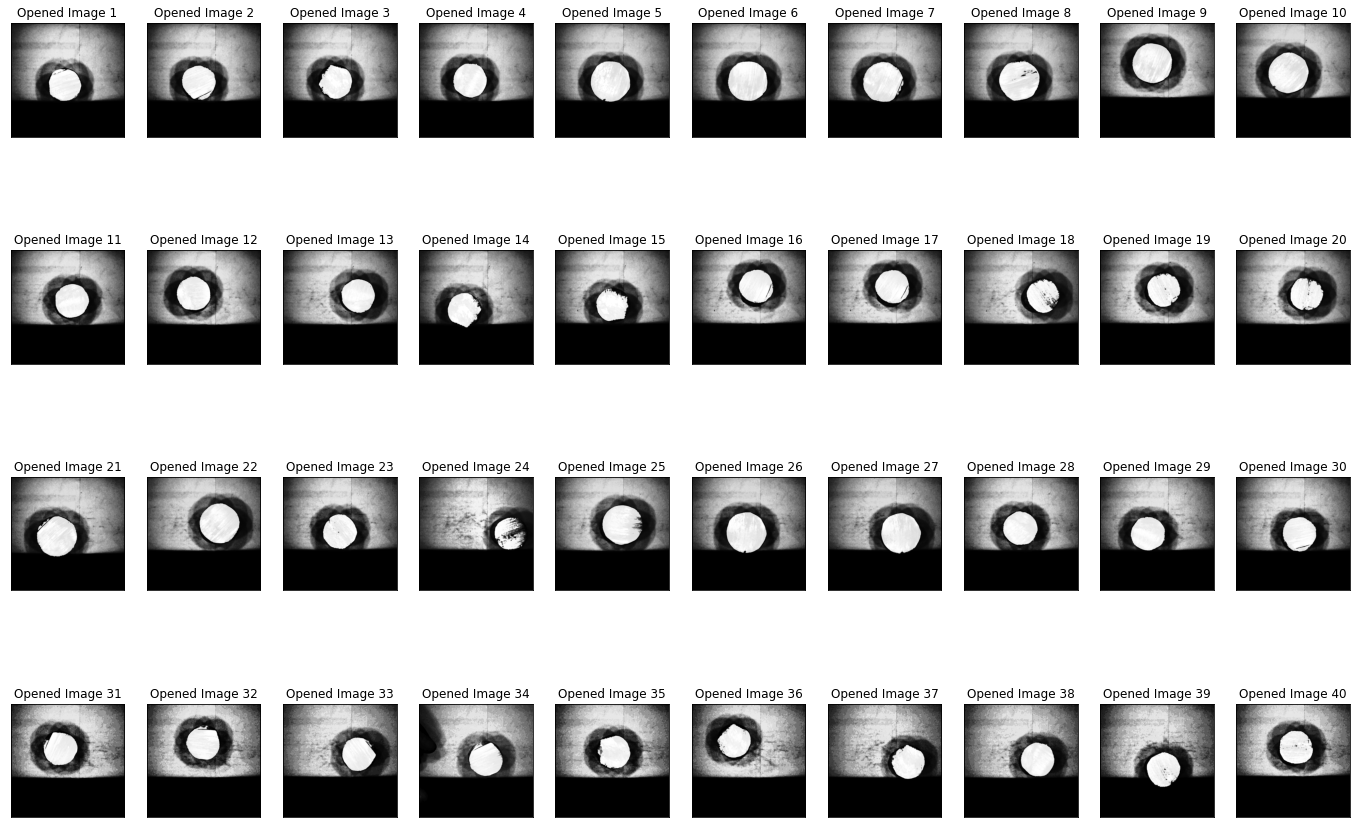

In [192]:
kernel = np.ones((5,5),np.uint8)
open_images=[]
for i in range(len(equal_images)):
    open_images.append(cv2.morphologyEx(equal_images[i], cv2.MORPH_OPEN, kernel))
    
    plt.subplot(4,10,i+1),plt.imshow(open_images[i],'gray')
    plt.title("Opened Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

### Closing

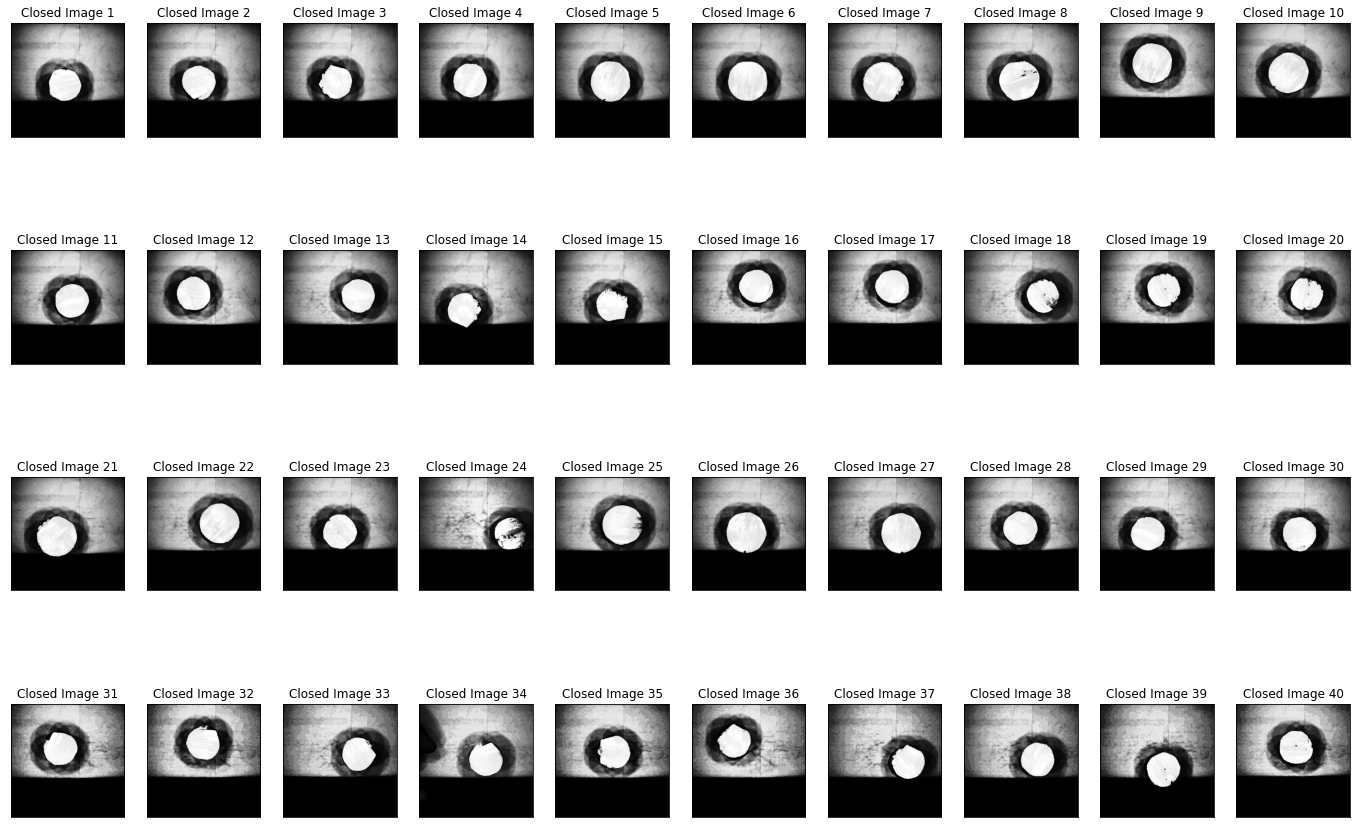

In [193]:
kernel = np.ones((5,5),np.uint8)
closed_images=[]
for i in range(len(equal_images)):
    closed_images.append(cv2.morphologyEx(open_images[i], cv2.MORPH_CLOSE, kernel))
    
    plt.subplot(4,10,i+1),plt.imshow(closed_images[i],'gray')
    plt.title("Closed Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

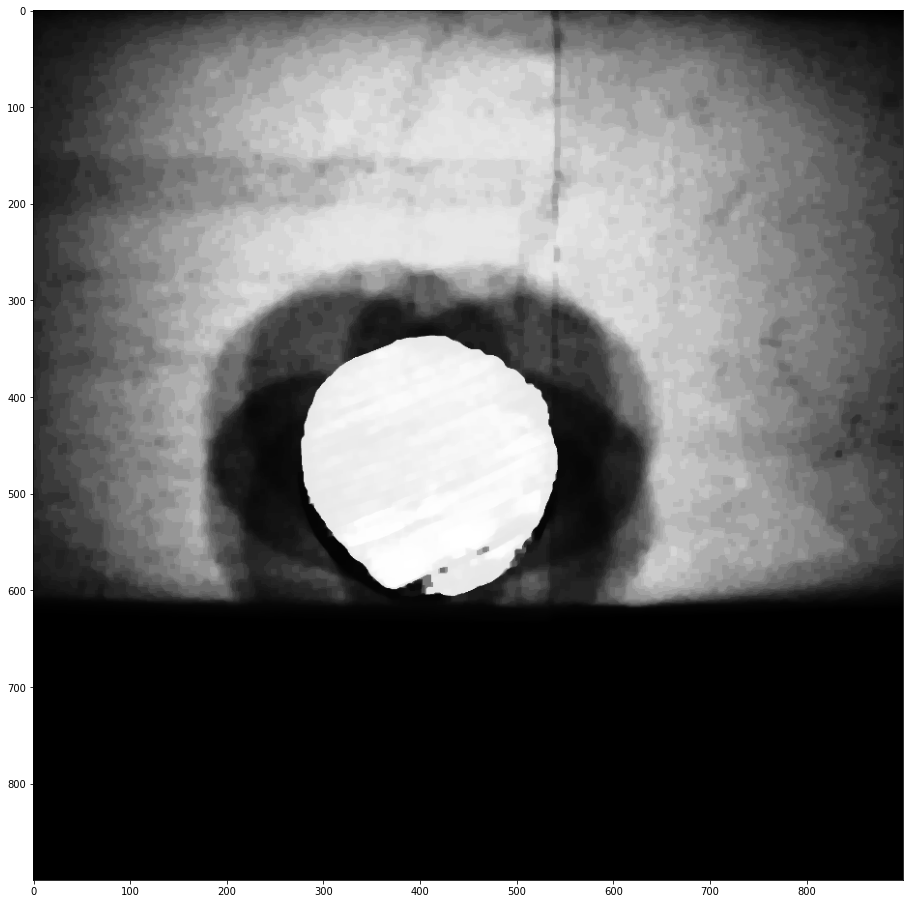

In [194]:
plt.imshow(closed_images[1], cmap='gray', vmin = 0, vmax = 255)

## Image Segmentation

### Binary Thresholding

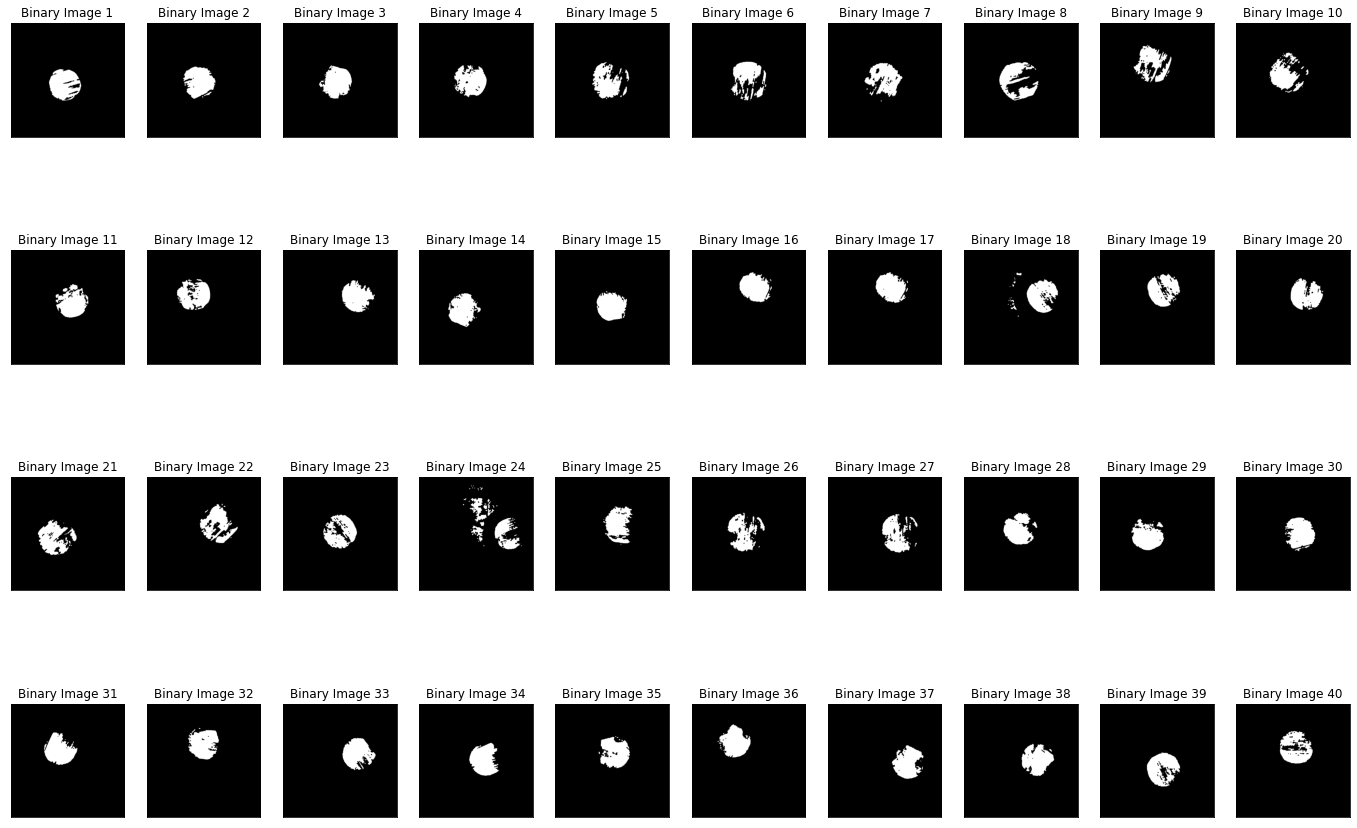

In [195]:
binary_images=[]
for i in range(len(closed_images)):
    ret,thresh = cv2.threshold(closed_images[i],235,255,cv2.THRESH_BINARY)
    binary_images.append(thresh)
    
    plt.subplot(4,10,i+1),plt.imshow(binary_images[i],'gray')
    plt.title("Binary Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

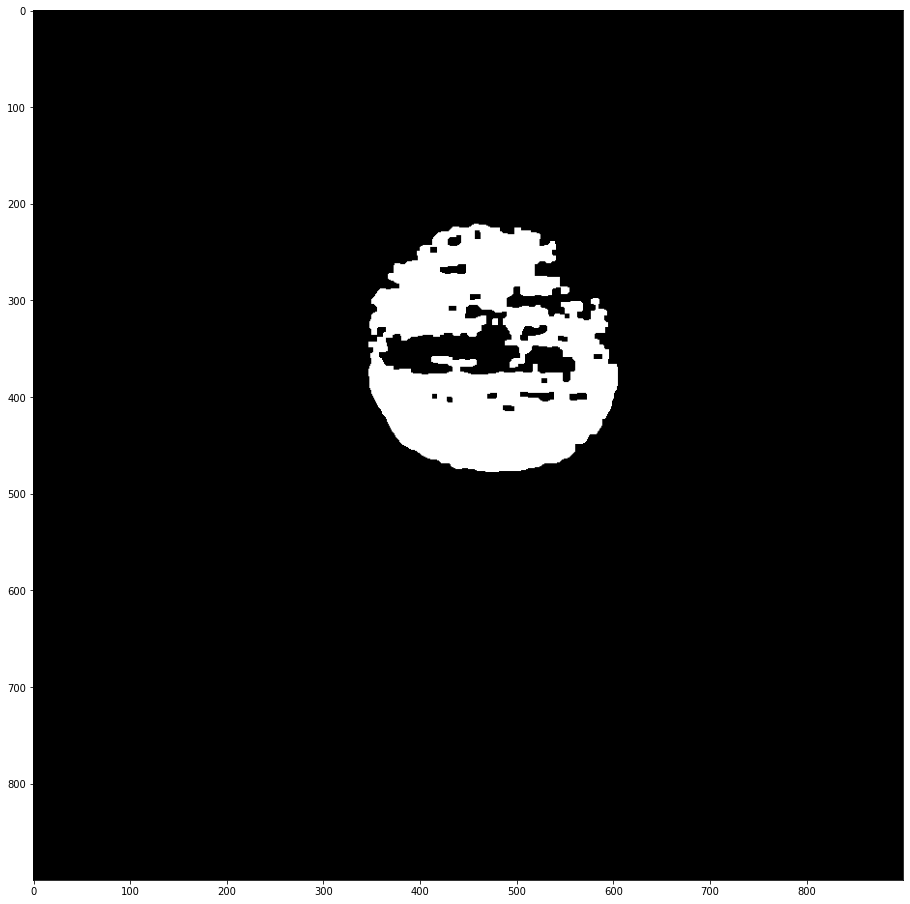

In [196]:
plt.imshow(binary_images[39], cmap='gray', vmin = 0, vmax = 255)

### Otsu Thresholding

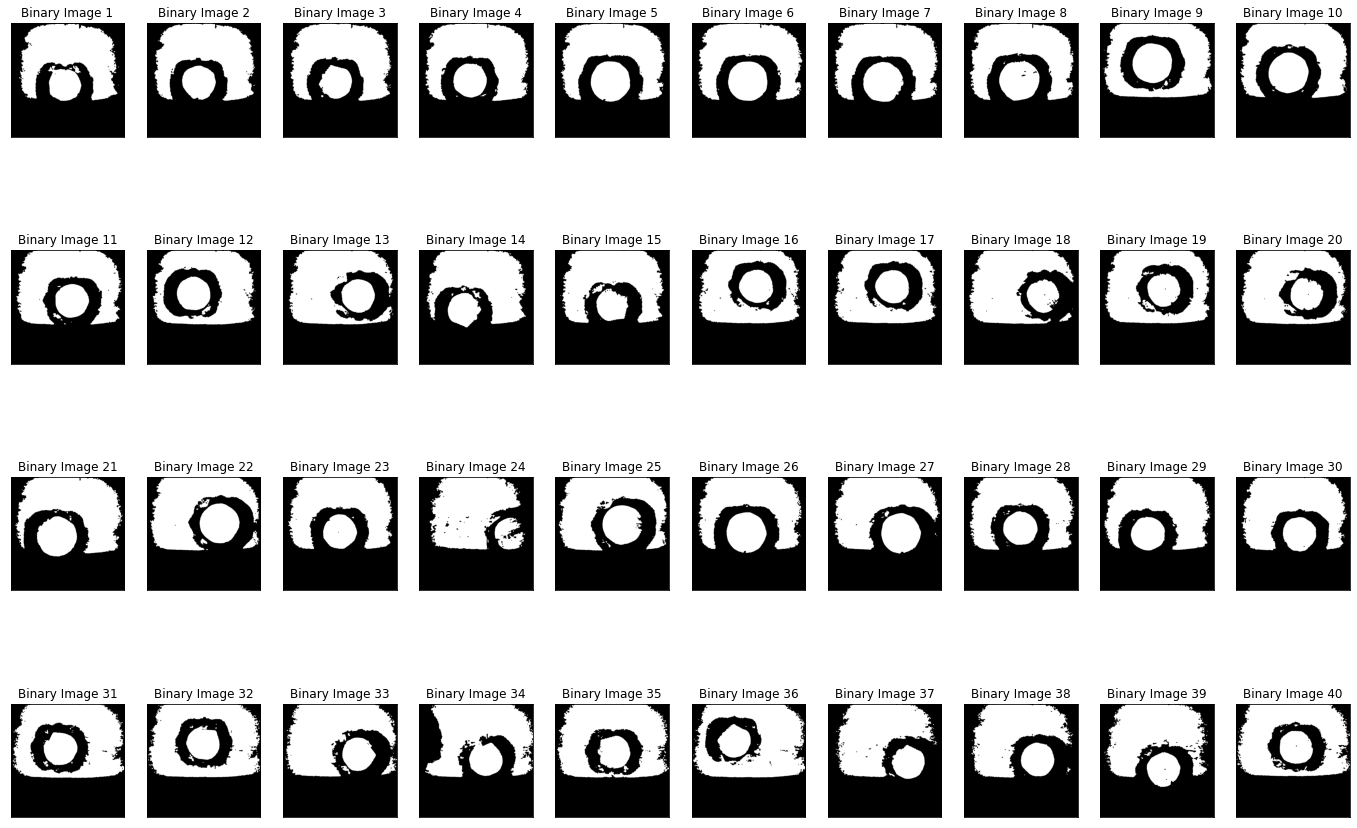

In [197]:
otsu_images=[]
for i in range(len(closed_images)):
    ret,thresh = cv2.threshold(closed_images[i],12,6,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    otsu_images.append(thresh)
    
    plt.subplot(4,10,i+1),plt.imshow(otsu_images[i],'gray')
    plt.title("Binary Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

### Adaptive Thresholding

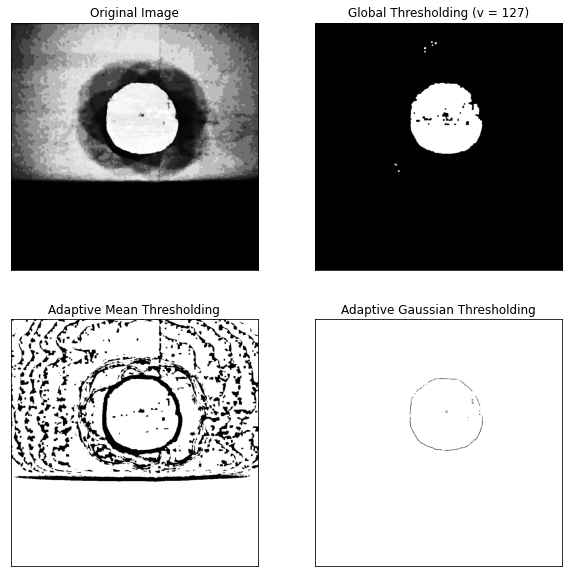

In [198]:
plt.rcParams["figure.figsize"]=2*5,2*5
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
adaptive_images=[]
for i in range(len(closed_images)):
    ret,th1 = cv2.threshold(closed_images[i],230,255,cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(closed_images[i],255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,33,10)
    th3 = cv2.adaptiveThreshold(closed_images[i],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,40) 
    aThresh_images= [closed_images[i], th1, th2, th3]
    adaptive_images.append(aThresh_images)

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(aThresh_images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
## to add display



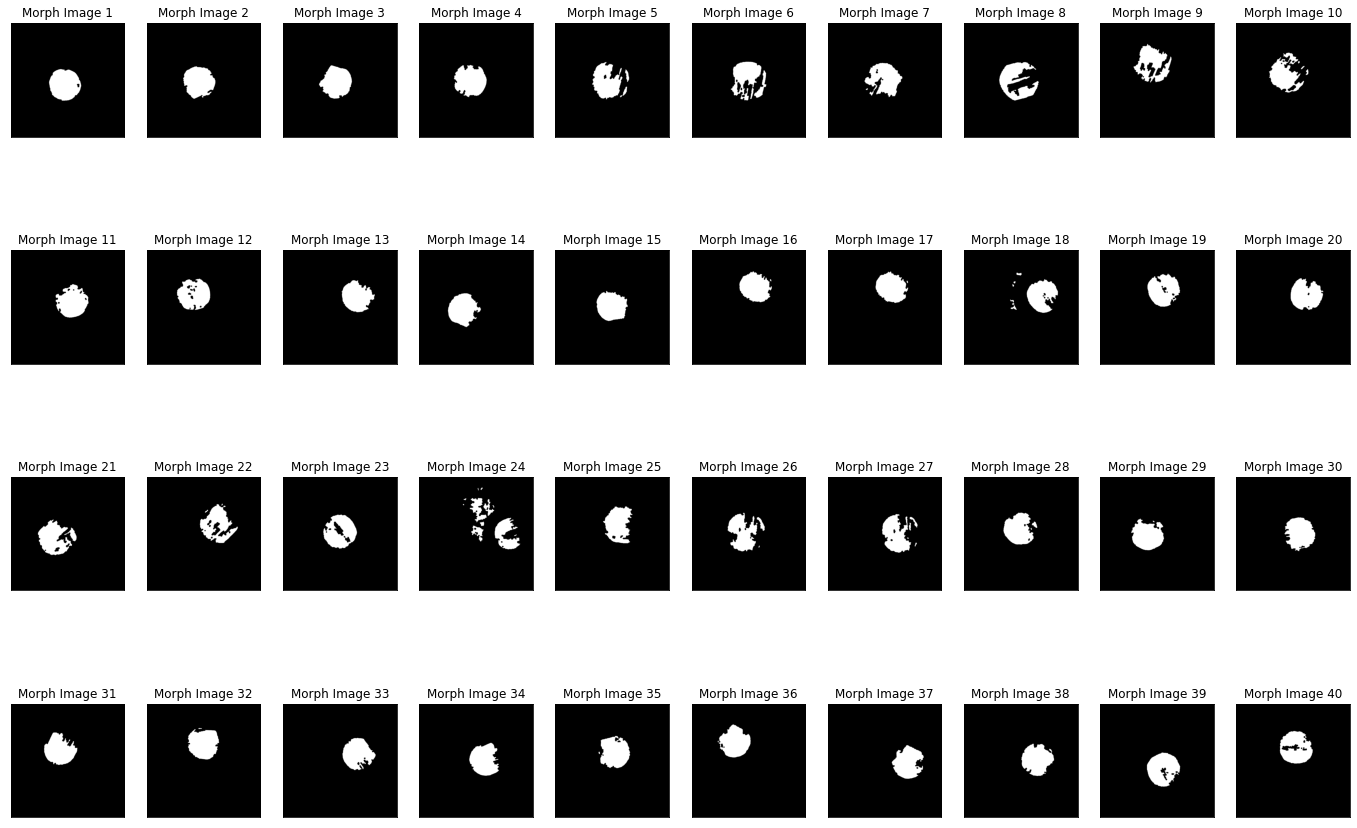

In [199]:
from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation
plt.rcParams["figure.figsize"]=24,16

morph_images=[]
for i in range(len(closed_images)):
    lum = closed_images[i]
    mask = morphology.remove_small_holes(morphology.remove_small_objects(lum < 235,255))
    mask = morphology.opening(mask, morphology.disk(5))
    morph_images.append(~mask)
    
    plt.subplot(4,10,i+1),plt.imshow(morph_images[i],'gray')
    plt.title("Morph Image "+str(i+1))
    plt.xticks([]),plt.yticks([])





## Feature Extraction

54428


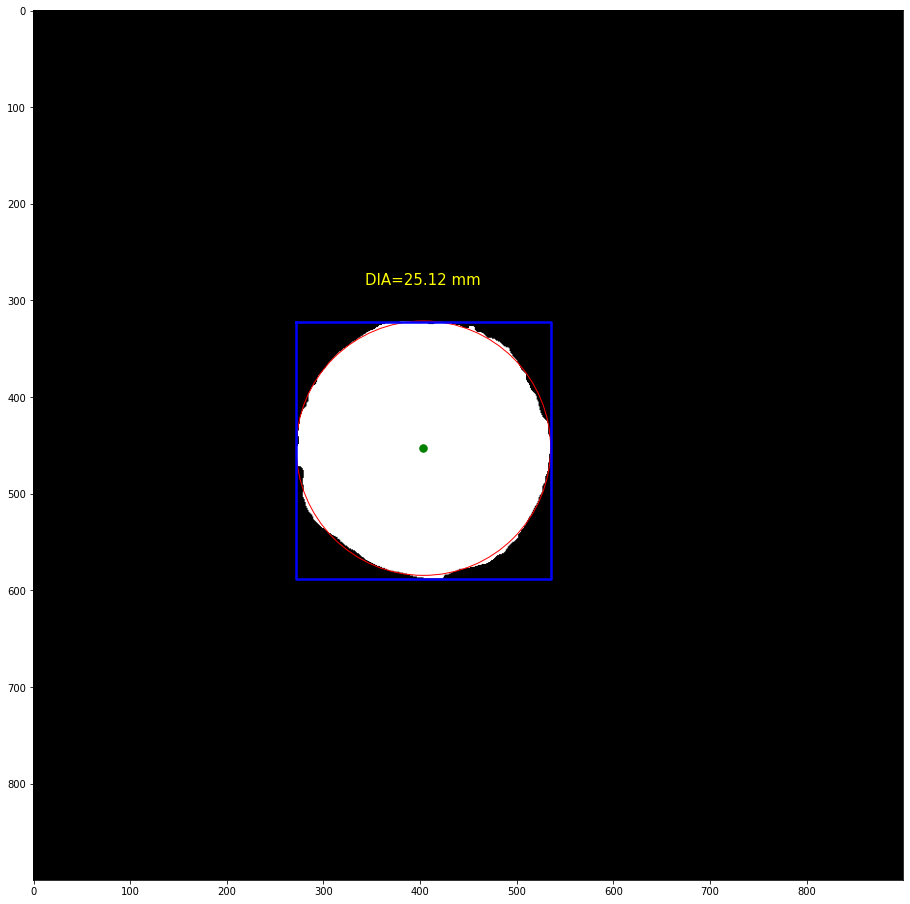

In [217]:
import pandas
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import erosion, dilation, opening, closing
from skimage.measure import label, regionprops
from skimage.color import label2rgb

#img = morph_images[3]
img=adaptive_images[3][1]

# Binary image, post-process the binary mask and compute labels
threshold = filters.threshold_otsu(img)
mask = img > threshold
mask = morphology.remove_small_objects(mask, 100)
mask = morphology.remove_small_holes(mask,150)
labels = measure.label(mask)

fig = px.imshow(img, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info

props = measure.regionprops(labels, img)
properties = ['area', 'eccentricity', 'perimeter']



#blobs = blob_log(otsu_images[j], max_sigma=120, min_sigma = 90, num_sigma=1, threshold=0.1, overlap = 0.1)

#label_img = label(otsu_images[j])
regions = regionprops(labels)


fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
for props in regions:
    
    y0, x0 = props.centroid
    print(getattr(props, 'area'))
    area=getattr(props, 'area')
    radi=np.sqrt(area/math.pi)/5.24

   # y, x, area = blob
    ax.add_patch(plt.Circle((x0, y0), radi*5.24, color='r',fill=False))
    #Dia=area*np.sqrt(2)/4.25 # conversion factor
    Dia=float("{0:.2f}".format(radi))
    str_dia="DIA="+ "% s" % Dia +" mm"
    ax.text(x0-60,y0-170,str_dia, color='yellow',fontsize=15)

    
    orientation = props.orientation
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)

    ax.plot(bx, by, '-b', linewidth=2.5)

## Results and Discussion

# What Next?

Quality Inspection in real time

# Annexure



<img src=".\measure.jpeg">

Workpiece Dia = 30.01 mm
Predict Dia =  157.6 px

i.e converstion factor =5.24

# References

Gonzalez, Rafael C. and Woods, Richard E.. Digital image processing. Upper Saddle River, N.J.: Prentice Hall, 2008

W. Sriratana, N. Narknam, R. Apichitanon and N. Tammarugwattana, "Application of Webcam for Inspection of Rice Grain Quality by Using Image Processing Technique," 2020 20th International Conference on Control, Automation and Systems (ICCAS), 2020, pp. 1134-1139, doi: 10.23919/ICCAS50221.2020.9268316.

https://learnopencv.com/contour-detection-using-opencv-python-c/

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html  

https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html  

https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html  
